In [1]:
import matplotlib.pyplot as plt

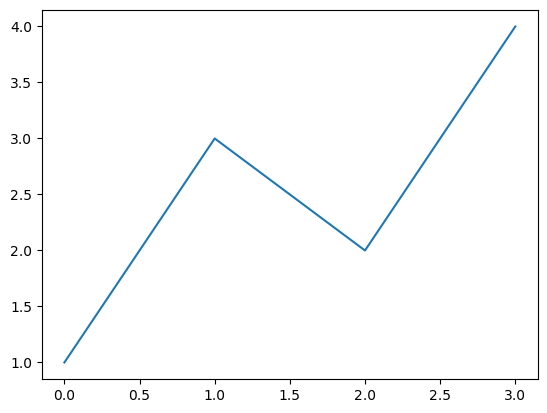

In [2]:
plt.plot([0,1,2,3],[1,3,2,4])
plt.show()